In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("data/Processed_rideshare_without_missing.csv")


In [5]:
df

,ID,Location,Provider,Service,Attribute,Timestamp,Value
0,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 06:00:00,11.00
1,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 07:00:00,13.50
2,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 08:00:00,13.50
3,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 09:00:00,13.50
4,T0,Back Bay,Lyft,Lux,price_min,2018-11-26 10:00:00,13.50
...,...,...,...,...,...,...,...
1246459,T2495,West End,Uber,WAV,wind,2018-12-18 14:00:00,13.89
1246460,T2495,West End,Uber,WAV,wind,2018-12-18 15:00:00,15.03
1246461,T2495,West End,Uber,WAV,wind,2018-12-18 16:00:00,14.60
1246462,T2495,West End,Uber,WAV,wind,2018-12-18 17:00:00,13.55


In [6]:
df["Location"].value_counts()

Location
Back Bay                   103872
Beacon Hill                103872
Boston University          103872
Fenway                     103872
Financial District         103872
Haymarket Square           103872
North End                  103872
North Station              103872
Northeastern University    103872
South Station              103872
Theatre District           103872
West End                   103872
Name: count, dtype: int64

In [7]:
df["Provider"].value_counts()

Provider
Uber    662184
Lyft    584280
Name: count, dtype: int64

In [8]:
df["Service"].value_counts()

Service
Lux             97380
Lux Black       97380
Lux Black XL    97380
Lyft            97380
Lyft XL         97380
Shared          97380
Black           97380
Black SUV       97380
UberPool        97380
UberXL          97380
UberX           97380
WAV             97380
Taxi            77904
Name: count, dtype: int64

In [9]:
df["Attribute"].value_counts()

Attribute
distance_max     84396
distance_mean    84396
distance_min     84396
surge_min        84396
api_calls        84396
surge_max        84396
surge_mean       84396
rain             84396
humidity         84396
clouds           84396
temp             84396
wind             84396
price_mean       77904
price_max        77904
price_min        77904
Name: count, dtype: int64

In [3]:
import pandas as pd

# 1. CSV 파일 읽기
df = pd.read_csv("data/Processed_rideshare_without_missing.csv")

# 2. 데이터 확인 (칼럼명 확인)
print("원본 데이터 칼럼:", df.columns.tolist())

# 3. (옵션) 만약 시계열 분석을 위해 Timestamp 칼럼이 있다면 datetime 형식으로 변환
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# 4. 피봇팅 진행
# 예시에서는 primary key로 'Location', 'Provider', 'Service', 그리고 'Timestamp'를 사용합니다.
# 만약 Timestamp 칼럼이 없다면 ['Location', 'Provider', 'Service'] 만 사용하면 됩니다.
primary_keys = ["Location", "Provider", "Service"]
if "Timestamp" in df.columns:
    primary_keys.append("Timestamp")

# pivot: 각 행의 Attribute 값이 새로운 컬럼이 되고, 그에 대응하는 Value 값이 채워집니다.
df_pivot = df.pivot(index=primary_keys, columns="Attribute", values="Value").reset_index()

# 5. 결과 확인
print("피봇팅된 데이터 (상위 5개 행):")


원본 데이터 칼럼: ['ID', 'Location', 'Provider', 'Service', 'Attribute', 'Timestamp', 'Value']
피봇팅된 데이터 (상위 5개 행):


In [8]:
df = pd.read_csv("data/Pivot_rideshare_with_missing.csv")
df

,Location,Provider,Service_Type,Timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_max,price_mean,price_min,rain,surge_max,surge_mean,surge_min,temp,wind
0,Back Bay,Lyft,Lux,2018-11-26 06:00:00+00:00,9.0,0.990667,3.03,1.726667,1.04,0.913333,22.5,16.555556,11.0,0.0,1.50,1.055556,1.0,40.627333,1.350667
1,Back Bay,Lyft,Lux,2018-11-26 07:00:00+00:00,10.0,0.970000,2.67,1.690000,1.09,0.920000,27.5,17.300000,13.5,0.0,2.00,1.100000,1.0,41.137500,1.735000
2,Back Bay,Lyft,Lux,2018-11-26 08:00:00+00:00,1.0,0.980000,1.38,1.380000,1.38,0.923333,13.5,13.500000,13.5,0.0,1.00,1.000000,1.0,40.920000,1.330000
3,Back Bay,Lyft,Lux,2018-11-26 09:00:00+00:00,11.0,1.000000,3.08,1.920909,1.39,0.927500,32.5,17.954545,13.5,0.0,1.75,1.113636,1.0,40.937500,1.365000
4,Back Bay,Lyft,Lux,2018-11-26 10:00:00+00:00,12.0,0.995000,3.01,2.122500,1.07,0.940000,26.0,18.625000,13.5,0.0,1.50,1.083333,1.0,40.695000,1.895000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84391,West End,Uber,WAV,2018-12-18 14:00:00+00:00,17.0,0.480000,3.20,2.055882,0.72,0.470000,19.0,9.852941,6.5,0.0,1.00,1.000000,1.0,26.190000,13.890000
84392,West End,Uber,WAV,2018-12-18 15:00:00+00:00,15.0,0.340000,3.20,1.854667,0.04,0.460000,11.0,8.933333,7.0,0.0,1.00,1.000000,1.0,27.220000,15.030000
84393,West End,Uber,WAV,2018-12-18 16:00:00+00:00,15.0,0.310000,2.84,2.011333,0.72,0.470000,16.5,9.733333,7.5,0.0,1.00,1.000000,1.0,28.700000,14.600000
84394,West End,Uber,WAV,2018-12-18 17:00:00+00:00,9.0,0.150000,3.20,2.271111,0.72,0.460000,13.0,10.222222,7.0,0.0,1.00,1.000000,1.0,30.050000,13.550000


In [11]:
df = df[["Location", "Provider", "Service_Type", "Timestamp", "price_max", "price_mean", "price_min"]]
df

,Location,Provider,Service_Type,Timestamp,price_max,price_mean,price_min
0,Back Bay,Lyft,Lux,2018-11-26 06:00:00+00:00,22.5,16.555556,11.0
1,Back Bay,Lyft,Lux,2018-11-26 07:00:00+00:00,27.5,17.300000,13.5
2,Back Bay,Lyft,Lux,2018-11-26 08:00:00+00:00,13.5,13.500000,13.5
3,Back Bay,Lyft,Lux,2018-11-26 09:00:00+00:00,32.5,17.954545,13.5
4,Back Bay,Lyft,Lux,2018-11-26 10:00:00+00:00,26.0,18.625000,13.5
...,...,...,...,...,...,...,...
84391,West End,Uber,WAV,2018-12-18 14:00:00+00:00,19.0,9.852941,6.5
84392,West End,Uber,WAV,2018-12-18 15:00:00+00:00,11.0,8.933333,7.0
84393,West End,Uber,WAV,2018-12-18 16:00:00+00:00,16.5,9.733333,7.5
84394,West End,Uber,WAV,2018-12-18 17:00:00+00:00,13.0,10.222222,7.0


In [15]:
df["Location"].value_counts()

Location
Back Bay                   7033
Beacon Hill                7033
Boston University          7033
Fenway                     7033
Financial District         7033
Haymarket Square           7033
North End                  7033
North Station              7033
Northeastern University    7033
South Station              7033
Theatre District           7033
West End                   7033
Name: count, dtype: int64

In [16]:
df["Provider"].value_counts()

Provider
Uber    45444
Lyft    38952
Name: count, dtype: int64

In [17]:
df["Service_Type"].value_counts()

Service_Type
Lux             6492
Lux Black       6492
Lux Black XL    6492
Lyft            6492
Lyft XL         6492
Shared          6492
Black           6492
Black SUV       6492
Taxi            6492
UberPool        6492
UberX           6492
UberXL          6492
WAV             6492
Name: count, dtype: int64

In [18]:
# 기본키에 해당하는 칼럼만 선택한 후, 중복 제거하여 고유한 조합을 구함
unique_keys = df[['Location', 'Provider', 'Service_Type']].drop_duplicates()
print("총 PK 개수:", unique_keys.shape[0])


총 PK 개수: 156


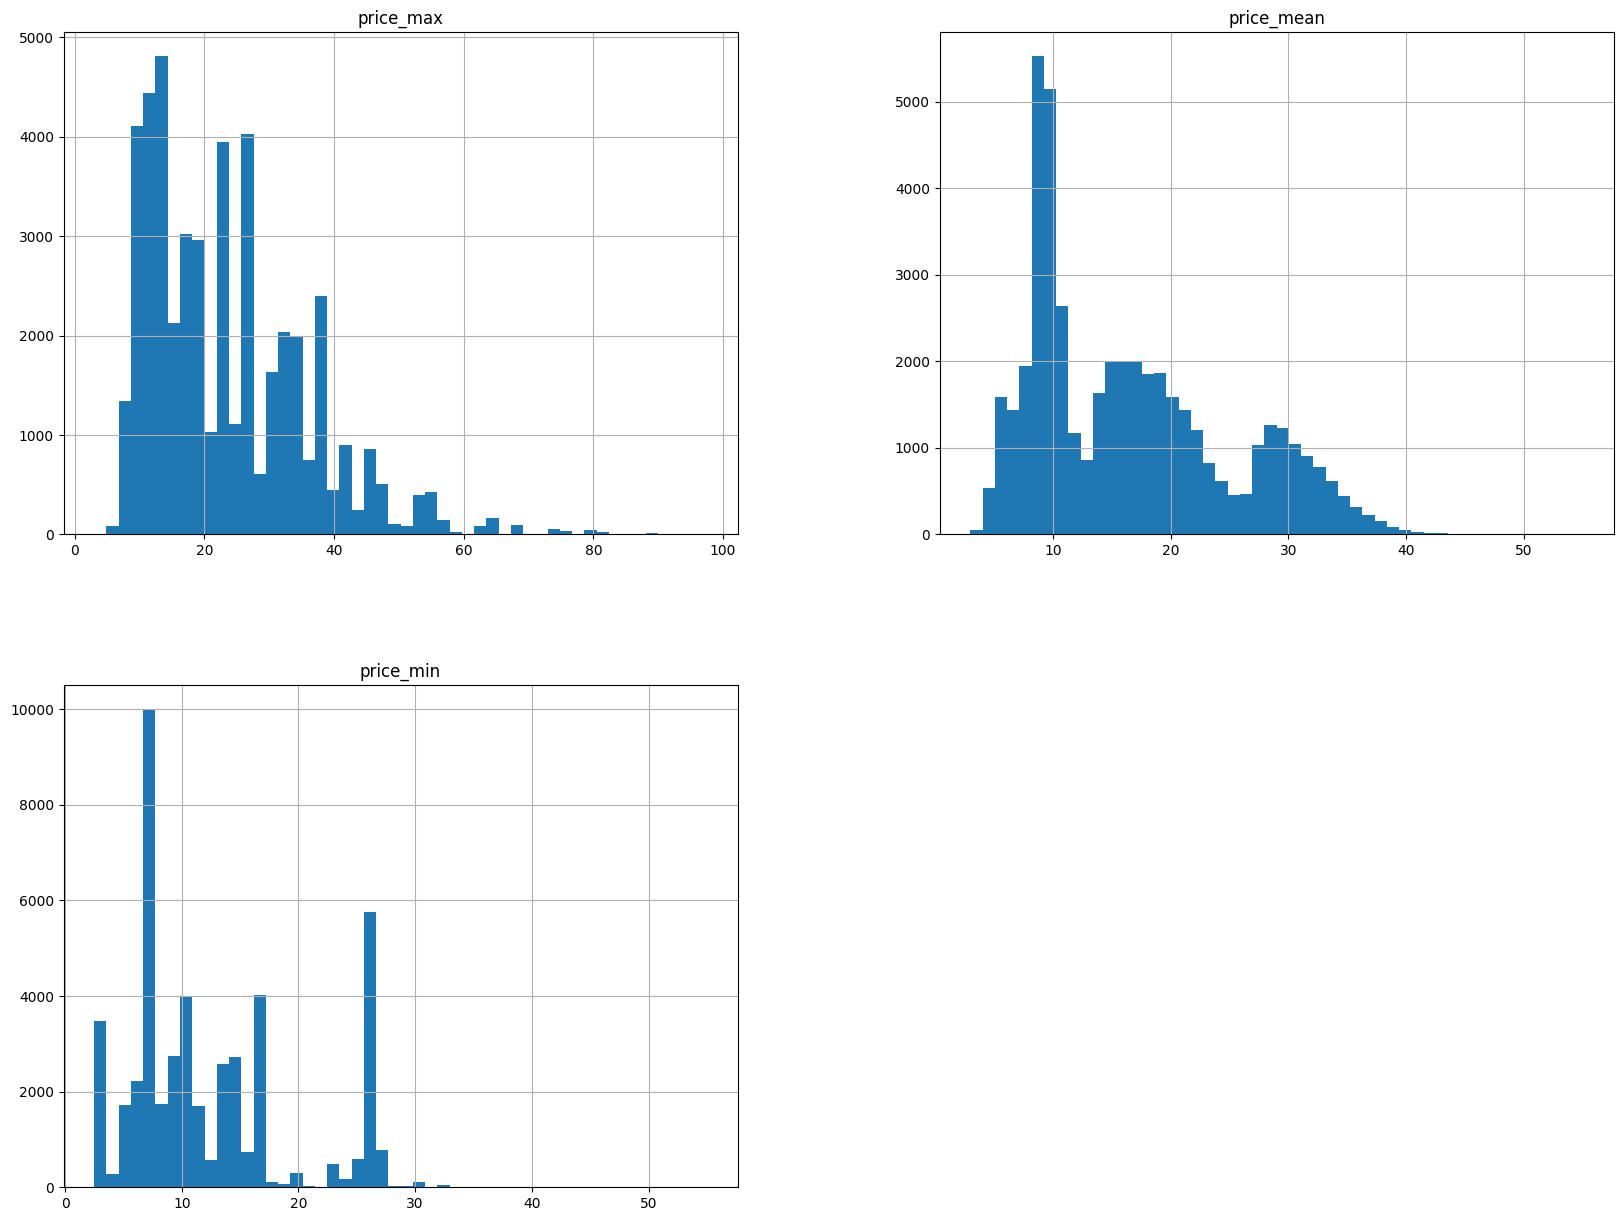

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [35]:
# 1. CSV 파일 읽기
df = pd.read_csv("data/Processed_rideshare_with_missing.csv")

# 2. 데이터 확인 (칼럼명 확인)
print("원본 데이터 칼럼:", df.columns.tolist())

# 3. (옵션) 만약 시계열 분석을 위해 Timestamp 칼럼이 있다면 datetime 형식으로 변환
if "Timestamp" in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# 4. 피봇팅 진행
# 예시에서는 primary key로 'Location', 'Provider', 'Service', 그리고 'Timestamp'를 사용합니다.
# 만약 Timestamp 칼럼이 없다면 ['Location', 'Provider', 'Service'] 만 사용하면 됩니다.
primary_keys = ["Location", "Provider", "Service_Type"]
if "Timestamp" in df.columns:
    primary_keys.append("Timestamp")

# pivot: 각 행의 Attribute 값이 새로운 컬럼이 되고, 그에 대응하는 Value 값이 채워집니다.
df_pivot = df.pivot(index=primary_keys, columns="Data_Type", values="Values").reset_index()

# 5. 결과 확인
print("피봇팅된 데이터 (상위 5개 행):")
df_pivot
df_pivot.to_csv("./data/Pivot_rideshare_with_missing.csv", index=False)

원본 데이터 칼럼: ['ID', 'Location', 'Provider', 'Service_Type', 'Data_Type', 'Timestamp', 'Values']
피봇팅된 데이터 (상위 5개 행):
